In [18]:
import numpy as np
import pandas as pd

from sklearn.svm import SVC, SVR
from sklearn.preprocessing import MinMaxScaler, minmax_scale
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier, MultiOutputRegressor
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import GridSearchCV, LeaveOneOut,KFold, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math
import scipy.stats as stats
import pickle
import warnings
warnings.filterwarnings(action='ignore')

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,confusion_matrix,accuracy_score
from sklearn.metrics import precision_recall_fscore_support,roc_curve,auc
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
#from eli5.sklearn import PermutationImportance
#from imblearn.combine import SMOTETomek
from sklearn.impute import SimpleImputer
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from pandas import Series, DataFrame


from sklearn.metrics import precision_score, recall_score, f1_score
import random

In [8]:
#스케일링
def imp(df):
    imputer = SimpleImputer(strategy='median')

    imputer.fit(df)
    output2 = imputer.transform(df)

    output2 = pd.DataFrame(output2, columns=df.columns, index=list(df.index.values))

    min_max_scaler = MinMaxScaler()
    fitted = min_max_scaler.fit(output2)
    output2 = min_max_scaler.transform(output2)
    output2 = pd.DataFrame(output2, columns=df.columns, index=list(df.index.values))

    datafrm = pd.DataFrame(output2)
    return datafrm

In [3]:
def df_maker(col_num, ind_num, fill):
    col = []
    ind = []
    con = []
    for i in range(0,col_num):
        col.append(fill)
    for i in range(0,ind_num):
        ind.append(fill)
    for i in range(0,ind_num):
        con.append(col)
    return pd.DataFrame(con, columns = col, index = ind)

In [4]:
file_path = r'C:/Users/user/Desktop/ML/Pumpkin_Seeds_Dataset.xlsx'

# Excel 파일을 읽고 데이터프레임으로 변환
df = pd.read_excel(file_path)
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


In [5]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['Class'] = label.fit_transform(df['Class'])
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,0
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,0
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,0
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,0
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,0


In [6]:
# 결측치 확인
missing_values = df.isna().sum()
print (missing_values)
# 결측치가 있는 행 제거
df_cleaned = df.dropna()


Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
Class                0
dtype: int64


In [9]:
df_s = imp(df_cleaned)

In [10]:
x = df_s.iloc[:,:-1]

y = df_s.iloc[:,-1]

In [11]:
x.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
0,0.094060,0.028593,0.015551,0.443011,0.094037,0.121346,0.538377,0.944591,0.766869,0.887532,0.166458,0.755304
1,0.323710,0.288960,0.282492,0.534065,0.321202,0.384261,0.735526,0.963061,0.683352,0.751688,0.316881,0.546062
2,0.267208,0.310438,0.337143,0.383178,0.269913,0.323187,0.839474,0.885224,0.752212,0.552727,0.459187,0.383900
3,0.208936,0.178831,0.178027,0.457938,0.208314,0.257917,0.702193,0.944591,0.751106,0.763636,0.283560,0.585876
4,0.204975,0.187652,0.184843,0.444415,0.208303,0.253390,0.716228,0.875989,0.573009,0.725195,0.296938,0.566405


In [12]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Class, dtype: float64

In [20]:
LR = LogisticRegression()
RF = RandomForestClassifier()
DT = DecisionTreeClassifier()
SVM =svm.SVC(kernel = 'rbf',probability=True)

LR_grid={'penalty': ['l1', 'l2'], 
            'C': [0.001, 0.01, 0.1, 1, 10, 100]
                   }

RF_grid={'max_depth': [4,6,8,10,12,14], # max_depth: The maximum depth of the tree.
              'n_estimators': [100,200,400,600], # n_estimators: The number of trees in the forest.
              'min_samples_split': [50, 100,25,75,125]
              }

DT_grid={'min_samples_leaf': [1, 2, 4, 8, 16]} 

SVM_grid = {'gamma': [0.01, 0.1, 1, 10, 100], 
               'C': [0.01, 0.1, 1, 10, 100]}

gridlist = [LR_grid,RF_grid,DT_grid,SVM_grid]
classlist = [LR,RF,DT,SVM]
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3,random_state = 42)

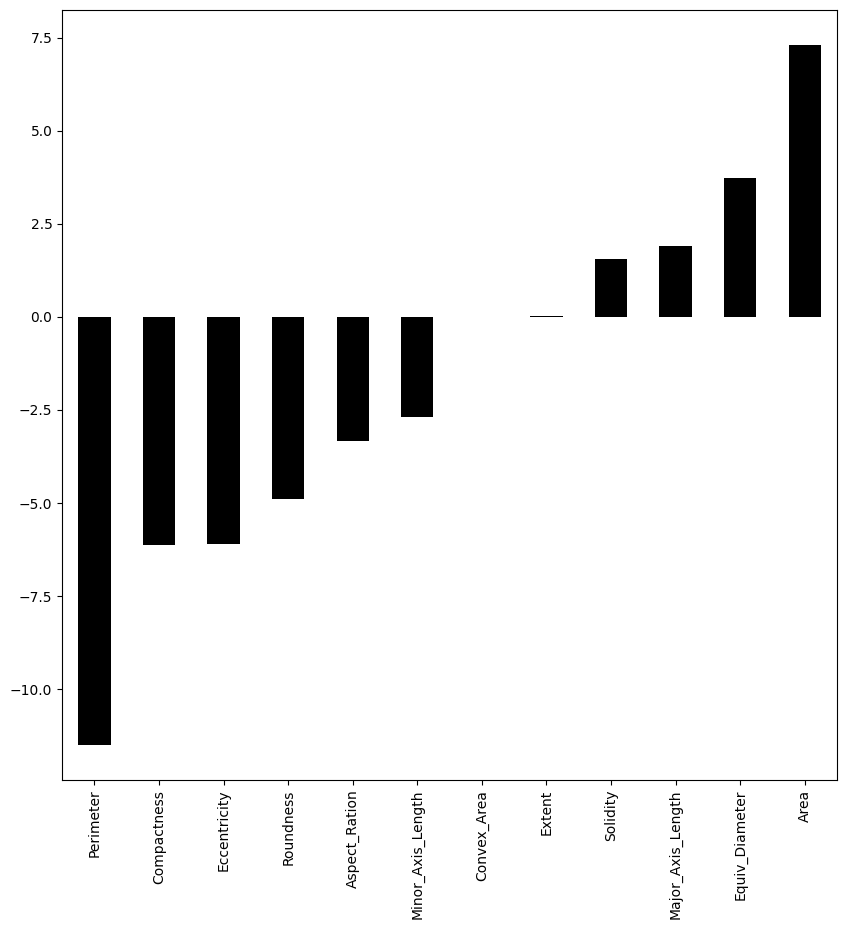

['Perimeter',
 'Compactness',
 'Eccentricity',
 'Roundness',
 'Aspect_Ration',
 'Minor_Axis_Length',
 'Extent',
 'Solidity',
 'Major_Axis_Length',
 'Equiv_Diameter',
 'Area']

In [21]:
lassoReg = Lasso(alpha=0.00001)
# training the model
lassoReg.fit(x, y)
plt.figure(figsize=(10,10))
predictors = x.columns
coef = Series(lassoReg.coef_, predictors).sort_values()
coef.plot(kind = 'bar',cmap='gray');
# evaluation using r-square
# X = X.drop('Item_Outlet_Sales',axis =1)
# x_train, x_cv, y_train, y_cv = train_test_split(X, train.Item_Outlet_Sales, test_size = 0.3)
# lassoReg.score(x_cv, y_cv)
cf = pd.DataFrame(coef)
li = []
for i in range(cf.shape[0]):
    if cf.iloc[i][0] > 0:
        li.append(cf.index[i])
    elif cf.iloc[i][0] < 0:
        li.append(cf.index[i])
#li = coef[-8:]
plt.show()
#plt.savefig('lasso_all.png',bbox_inches='tight', pad_inches=0.5) 
li

In [22]:
def gridsearch(gridlist,classlist,train_x,train_y):
    for i in range(4):
        grid = GridSearchCV(classlist[i], gridlist[i], scoring = 'roc_auc', cv=5,n_jobs=-1)  
        grid.fit(train_x, train_y)
        print(classlist[i])
        print(grid.best_params_)
        print(grid.best_score_)
        classlist[i] = grid.best_estimator_
    return classlist

In [23]:
x = df_s[li]
x
#train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state = 42)

,Perimeter,Compactness,Eccentricity,Roundness,Aspect_Ration,Minor_Axis_Length,Extent,Solidity,Major_Axis_Length,Equiv_Diameter,Area
0,0.028593,0.755304,0.538377,0.887532,0.166458,0.443011,0.766869,0.944591,0.015551,0.121346,0.094060
1,0.288960,0.546062,0.735526,0.751688,0.316881,0.534065,0.683352,0.963061,0.282492,0.384261,0.323710
2,0.310438,0.383900,0.839474,0.552727,0.459187,0.383178,0.752212,0.885224,0.337143,0.323187,0.267208
3,0.178831,0.585876,0.702193,0.763636,0.283560,0.457938,0.751106,0.944591,0.178027,0.257917,0.208936
4,0.187652,0.566405,0.716228,0.725195,0.296938,0.444415,0.573009,0.875989,0.184843,0.253390,0.204975
...,...,...,...,...,...,...,...,...,...,...,...
2495,0.515547,0.106074,0.969079,0.292468,0.827229,0.249046,0.057522,0.951187,0.622479,0.419964,0.357624
2496,0.312365,0.239756,0.916667,0.492987,0.633712,0.258055,0.365597,0.967018,0.416625,0.298503,0.244915
2497,0.494712,0.287998,0.892325,0.520260,0.568272,0.455692,0.819414,0.968338,0.546449,0.515824,0.451910
2498,0.455106,0.218251,0.923026,0.425714,0.652703,0.342223,0.745022,0.928760,0.530869,0.424359,0.361844


In [24]:
classlist = gridsearch(gridlist,classlist,x,y)

LogisticRegression()
{'C': 100, 'penalty': 'l2'}
0.9396538461538462
RandomForestClassifier()
{'max_depth': 10, 'min_samples_split': 25, 'n_estimators': 400}
0.9487339743589743
DecisionTreeClassifier()
{'min_samples_leaf': 16}
0.9255961538461539
SVC(probability=True)
{'C': 100, 'gamma': 1}
0.9467339743589743


In [26]:
LR = LogisticRegression(C= 100, penalty= 'l2')
RF = RandomForestClassifier(max_depth= 10, min_samples_split= 25, n_estimators= 400)
XGB = DecisionTreeClassifier(min_samples_leaf = 16)
SVM =svm.SVC(kernel = 'rbf',C=100, gamma = 1,probability=True)

classlist = [LR,RF,XGB,SVM]

In [27]:
def cross_val(classlist,train_x,train_y):
    kf = StratifiedKFold(n_splits=5, shuffle=True)
    LR = classlist[0]
    RF = classlist[1]
    DT = classlist[2]
    SVM = classlist[3]
    
    LR.fit(train_x,train_y)
    RF.fit(train_x,train_y)
    DT.fit(train_x,train_y)
    SVM.fit(train_x,train_y)
    
    LR_scores = cross_val_score(LR, train_x, train_y, cv = kf)
    RF_scores = cross_val_score(RF, train_x, train_y, cv = kf)
    DT_scores = cross_val_score(DT, train_x, train_y, cv = kf)
    SVM_scores = cross_val_score(SVM, train_x, train_y, cv = kf)
        
    score_mean = [LR_scores.mean(), RF_scores.mean(), DT_scores.mean(), SVM_scores.mean()]
    
    score = df_maker(4,5,0)
    score.columns = ['LR_scores','RF_scores','DT_scores','SVM_scores']
    score[score.columns[0]] = LR_scores
    score[score.columns[1]] = RF_scores
    score[score.columns[2]] = DT_scores
    score[score.columns[3]] = SVM_scores
    score.index = [1,2,3,4,5]
    
    return score_mean

In [28]:
cross_val(classlist,x,y)

[0.8831999999999999, 0.8884000000000001, 0.8744, 0.8859999999999999]

In [29]:
def CI(classlist,x,y):
    random.seed(100)
    X = np.array(x)
    y = y
    X, y = X[y != 2], y[y != 2]

    n_samples, n_features = X.shape

    # Add noisy features
    random_state = np.random.RandomState(0)

    skf = StratifiedKFold(n_splits=5, shuffle=True)

    i = 0
    
    
    
    
    con_lr_li=[]
    pre_lr_li=[]
    re_lr_li=[]
    f1_lr_li=[]

    con_rf_li=[]
    pre_rf_li=[]
    re_rf_li=[]
    f1_rf_li=[]

    con_dt_li=[]
    pre_dt_li=[]
    re_dt_li=[]
    f1_dt_li=[]
    
    con_svm_li=[]
    pre_svm_li=[]
    re_svm_li=[]
    f1_svm_li=[]
    
    for train_index, test_index in skf.split(X, y):
        i+1


        train_x, test_x = X[train_index], X[test_index]
        train_y, test_y = y[train_index], y[test_index]
    #    print("TRAIN:", train_index, "TEST:", test_index)


        LR = classlist[0]
        RF = classlist[1]
        DT = classlist[2]
        SVM = classlist[3]
        
        lr_pred = LR.fit(train_x,train_y).predict(test_x)
        rf_pred = RF.fit(train_x,train_y).predict(test_x)
        dt_pred = DT.fit(train_x,train_y).predict(test_x)
        svm_pred = SVM.fit(train_x,train_y).predict(test_x)
        
        
        
        con_lr = confusion_matrix(test_y, lr_pred)
        pre_lr = precision_score(test_y, lr_pred)
        re_lr = recall_score(test_y, lr_pred)
        f1_lr = f1_score(test_y, lr_pred)
        
        con_lr_li.append(con_lr)
        pre_lr_li.append(pre_lr)
        re_lr_li.append(re_lr)
        f1_lr_li.append(f1_lr)
        
        
        
        con_rf = confusion_matrix(test_y, rf_pred)
        pre_rf = precision_score(test_y, rf_pred)
        re_rf = recall_score(test_y, rf_pred)
        f1_rf = f1_score(test_y, rf_pred)
        
        con_rf_li.append(con_rf)
        pre_rf_li.append(pre_rf)
        re_rf_li.append(re_rf)
        f1_rf_li.append(f1_rf)
        
        
        
        con_dt = confusion_matrix(test_y, dt_pred)
        pre_dt = precision_score(test_y, dt_pred)
        re_dt = recall_score(test_y, dt_pred)
        f1_dt = f1_score(test_y, dt_pred)
        
        con_dt_li.append(con_dt)
        pre_dt_li.append(pre_dt)
        re_dt_li.append(re_dt)
        f1_dt_li.append(f1_dt)
        
        
        
        con_svm = confusion_matrix(test_y, svm_pred)
        pre_svm = precision_score(test_y, svm_pred)
        re_svm = recall_score(test_y, svm_pred)
        f1_svm = f1_score(test_y, svm_pred)
        
        con_svm_li.append(con_svm)
        pre_svm_li.append(pre_svm)
        re_svm_li.append(re_svm)
        f1_svm_li.append(f1_svm)

        
        

    mean_con_lr = np.mean(con_lr_li)
    mean_pre_lr = np.mean(pre_lr_li)
    mean_re_lr = np.mean(re_lr_li)
    mean_f1_lr = np.mean(f1_lr_li)
    
    mean_con_rf = np.mean(con_rf_li)
    mean_pre_rf = np.mean(pre_rf_li)
    mean_re_rf = np.mean(re_rf_li)
    mean_f1_rf = np.mean(f1_rf_li)
    
    mean_con_dt = np.mean(con_dt_li)
    mean_pre_dt = np.mean(pre_dt_li)
    mean_re_dt = np.mean(re_dt_li)
    mean_f1_dt = np.mean(f1_dt_li)
    
    mean_con_svm = np.mean(con_svm_li)
    mean_pre_svm = np.mean(pre_svm_li)
    mean_re_svm = np.mean(re_svm_li)
    mean_f1_svm = np.mean(f1_svm_li)
    
    s = 'LR : precision = {0}, recall = {1}, f1 = {2}'.format(mean_pre_lr, mean_re_lr, mean_f1_lr)
    d = 'RF : precision = {0}, recall = {1}, f1 = {2}'.format(mean_pre_rf, mean_re_rf, mean_f1_rf)
    f = 'XGB : precision = {0}, recall = {1}, f1 = {2}'.format(mean_pre_dt, mean_re_dt, mean_f1_dt)
    g = 'SVM : precision = {0}, recall = {1}, f1 = {2}'.format(mean_pre_svm, mean_re_svm, mean_f1_svm)
    return print(s, d, f, g, sep = '\n')
        

In [30]:
CI(classlist,x,y)

LR : precision = 0.8962209053991204, recall = 0.8433333333333334, f1 = 0.8684935971492278
RF : precision = 0.8977219322757983, recall = 0.8583333333333334, f1 = 0.8772355070717774
XGB : precision = 0.8757860570140437, recall = 0.85, f1 = 0.8624453432569222
SVM : precision = 0.9185485624187871, recall = 0.8383333333333333, f1 = 0.8761765359728017


In [31]:
def bootstrap(x, f, nsamples=1000):
    stats = [f(x[np.random.randint(x.shape[0], size=x.shape[0])]) for _ in range(nsamples)]
    return np.percentile(stats, (2.5, 97.5))

In [32]:
stata = df_maker(8,93,0)
stata.columns = ['lr_tpr','lr_fpr','rf_tpr','rf_fpr','dt_tpr','dt_fpr','svm_tpr','svm_fpr']
stata

,lr_tpr,lr_fpr,rf_tpr,rf_fpr,dt_tpr,dt_fpr,svm_tpr,svm_fpr
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0


In [33]:
def create_roc(classlist,x,x_,y):
    stata = df_maker(8,100,0)
    stata.columns = ['lr_tpr','lr_fpr','rf_tpr','rf_fpr','dt_tpr','dt_fpr','svm_tpr','svm_fpr']

    X = np.array(x)
    X_ = np.array(x_)
    y = y
    X, y = X[y != 2], y[y != 2]
    X_ = X_[y != 2]
    n_samples, n_features = X.shape

    # Add noisy features
    
    #X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

    skf = StratifiedKFold(n_splits=5,random_state = 0 ,shuffle=True)

    mean_tpr_lr = 0.0
    mean_fpr_lr = np.linspace(0, 1, 100)

    mean_tpr_rf = 0.0
    mean_fpr_rf = np.linspace(0, 1, 100)

    mean_tpr_dt = 0.0
    mean_fpr_dt = np.linspace(0, 1, 100)

    mean_tpr_svm = 0.0
    mean_fpr_svm = np.linspace(0, 1, 100)

    #all_tpr = []
    i = 0
    
    
    
    for train_index, test_index in skf.split(X, y):
        i+1


        train_x, test_x = X[train_index], X[test_index]
        train_x_, test_x_ = X_[train_index], X_[test_index]
        train_y, test_y = y[train_index], y[test_index]
    #    print("TRAIN:", train_index, "TEST:", test_index)


        LR = classlist[0]
        RF = classlist[1]
        DT = classlist[2]
        SVM = classlist[3]


        lr_proba = LR.fit(train_x,train_y).predict_proba(test_x)
        lr_proba_ = LR.fit(train_x_,train_y).predict_proba(test_x_)
        
        
        rf_proba = RF.fit(train_x,train_y).predict_proba(test_x)
        rf_proba_ = RF.fit(train_x_,train_y).predict_proba(test_x_)
        
        dt_proba = XGB.fit(train_x,train_y).predict_proba(test_x)
        dt_proba_ = DT.fit(train_x_,train_y).predict_proba(test_x_)
        
        SVM_proba = SVM.fit(train_x,train_y).predict_proba(test_x)
        SVM_proba_ = SVM.fit(train_x_,train_y).predict_proba(test_x_)
        


        fpr_lr, tpr_lr, thresholds = roc_curve(test_y,lr_proba[:, 1])
        fpr_rf, tpr_rf, thresholds = roc_curve(test_y,rf_proba[:, 1])
        fpr_dt, tpr_dt, thresholds = roc_curve(test_y,dt_proba[:, 1])
        fpr_svm, tpr_svm, thresholds = roc_curve(test_y,SVM_proba[:, 1])


        mean_tpr_lr += interp(mean_fpr_lr, fpr_lr, tpr_lr)
        mean_tpr_lr[0] = 0.0

        mean_tpr_rf += interp(mean_fpr_rf, fpr_rf, tpr_rf)
        mean_tpr_rf[0] = 0.0

        mean_tpr_dt += interp(mean_fpr_dt, fpr_dt, tpr_dt)
        mean_tpr_dt[0] = 0.0

        mean_tpr_svm += interp(mean_fpr_svm, fpr_svm, tpr_svm)
        mean_tpr_svm[0] = 0.0


    plt.figure(figsize=(10,10))
    mean_tpr_lr /= 5
    mean_tpr_lr[-1] = 1.0
    mean_auc_lr = auc(mean_fpr_lr, mean_tpr_lr)
    plt.plot(mean_fpr_lr, mean_tpr_lr,'black',linestyle='solid' , label="LR (AUC= %s)"%(round(mean_auc_lr,3)))

    mean_tpr_rf /= 5
    mean_tpr_rf[-1] = 1.0
    mean_auc_rf = auc(mean_fpr_rf, mean_tpr_rf)
    plt.plot(mean_fpr_rf, mean_tpr_rf,'black',linestyle='dotted', label="RF (AUC= %s)"%(round(mean_auc_rf,3)))

    mean_tpr_dt /= 5
    mean_tpr_dt[-1] = 1.0
    mean_auc_dt = auc(mean_fpr_dt, mean_tpr_dt)
    plt.plot(mean_fpr_dt, mean_tpr_dt,'black',linestyle='dashed', label="XGB (AUC= %s)"%(round(mean_auc_dt,3)))

    mean_tpr_svm /= 5
    mean_tpr_svm[-1] = 1.0
    mean_auc_svm = auc(mean_fpr_svm, mean_tpr_svm)
    plt.plot(mean_fpr_svm, mean_tpr_svm,'black',linestyle='dashdot', label="SVM (AUC= %s)"%(round(mean_auc_svm,3)))


    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
#     plt.xlabel('1-specificity',fontsize=12)
#     plt.ylabel('sensitivity',fontsize=15)
#     plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right",fontsize=20)
    plt.show()
    
    
    stata['lr_tpr'] = mean_tpr_lr
    stata['lr_fpr'] = mean_fpr_lr
    
    stata['rf_tpr'] = mean_tpr_rf
    stata['rf_fpr'] = mean_fpr_rf
    
    stata['xgb_tpr'] = mean_tpr_dt
    stata['xgb_fpr'] = mean_fpr_dt
    
    stata['svm_tpr'] = mean_tpr_svm
    stata['svm_fpr'] = mean_fpr_svm
    
    #plt.savefig('ML_fractal.png',bbox_inches='tight', pad_inches=0.5) 
#     print('LR : TP = {0}, FP = {1}'.format(mean_fpr_lr, mean_tpr_lr))
#     print('RF : TP = {0}, FP = {1}'.format(mean_fpr_rf, mean_tpr_rf))
#     print('XGB : TP = {0}, FP = {1}'.format(mean_fpr_xgb, mean_tpr_xgb))

#     print('SVM : TP = {0}, FP = {1}'.format(mean_fpr_svm, mean_tpr_svm))
    return 0

In [34]:
a=create_roc(classlist,x,x_,y)

NameError: name 'x_' is not defined

In [153]:
dff = pd.DataFrame(a[0])
for i in range(1,len(a)):
    add = pd.DataFrame(a[i])
    dff = pd.concat([dff,add],axis=1)
    print(i)

1
2
3
4
5
6
7


In [155]:
dff.columns = ['lr_0_r','lr_1_r','lr_0_f','lr_1_f','rf_0_r','rf_1_r','rf_0_f','rf_1_r','dt_0_r','dt_1_r','dt_0_f','dt_1_f','svm_0_r','svm_1_r','svm_0_f','svm_1_f']
dff

,lr_0_r,lr_1_r,lr_0_f,lr_1_f,rf_0_r,rf_1_r,rf_0_f,rf_1_r,xgb_0_r,xgb_1_r,xgb_0_f,xgb_1_f,svm_0_r,svm_1_r,svm_0_f,svm_1_f
0,0.822186,0.177814,0.837887,0.162113,0.935179,0.064821,0.918761,0.081239,0.996019,0.003981,0.963396,0.036604,0.809774,0.190226,0.819348,0.180652
1,0.583473,0.416527,0.578802,0.421198,0.709954,0.290046,0.587638,0.412362,0.980825,0.019175,0.630295,0.369705,0.578232,0.421768,0.613204,0.386796
2,0.995909,0.004091,0.978601,0.021399,0.961245,0.038755,0.958131,0.041869,0.995570,0.004430,0.991468,0.008532,0.992335,0.007665,0.981690,0.018310
3,0.741884,0.258116,0.601357,0.398643,0.704653,0.295347,0.474792,0.525208,0.866880,0.133120,0.633052,0.366948,0.654191,0.345809,0.611032,0.388968
4,0.951842,0.048158,0.979863,0.020137,0.840543,0.159457,0.815254,0.184746,0.971989,0.028011,0.915843,0.084157,0.959099,0.040901,0.982038,0.017962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.689446,0.310554,0.628766,0.371234,0.313647,0.686353,0.410552,0.589448,0.339204,0.660796,0.572799,0.427201,0.651915,0.348085,0.611520,0.388480
89,0.601284,0.398716,0.583249,0.416751,0.686933,0.313067,0.754206,0.245794,0.769350,0.230650,0.927097,0.072903,0.556539,0.443461,0.581483,0.418517
90,0.315130,0.684870,0.405296,0.594704,0.481819,0.518181,0.617190,0.382810,0.595934,0.404066,0.540171,0.459829,0.321414,0.678586,0.426959,0.573041
91,0.071818,0.928182,0.074265,0.925735,0.078861,0.921139,0.061839,0.938161,0.005962,0.994038,0.006577,0.993423,0.086613,0.913387,0.070804,0.929196


In [205]:
def roccomp(classlist,x,x_,y):
    dom = df_maker(0,0,0)
    lr = df_maker(0,0,0)
    rf = df_maker(0,0,0)
    dt = df_maker(0,0,0)
    svm = df_maker(0,0,0)
    
    lr_ = df_maker(0,0,0)
    rf_ = df_maker(0,0,0)
    dt_ = df_maker(0,0,0)
    svm_ = df_maker(0,0,0)
    
    #stata_roc.columns = ['lr_r_0','lr_r_1','lr_f_0','lr_f_1']
    
    
    X = np.array(x)
    X_ = np.array(x_)
    y = y
    X, y = X[y != 2], y[y != 2]
    X_ = X_[y != 2]
    n_samples, n_features = X.shape


    skf = StratifiedKFold(n_splits=5,random_state = 0 ,shuffle=True)

    i = 0
    
    
    
    for train_index, test_index in skf.split(X, y):
        i+1


        train_x, test_x = X[train_index], X[test_index]
        train_x_, test_x_ = X_[train_index], X_[test_index]
        train_y, test_y = y[train_index], y[test_index]


        LR = classlist[0]
        RF = classlist[1]
        DT = classlist[2]
        SVM = classlist[3]


        lr_proba = LR.fit(train_x,train_y).predict_proba(test_x)
        lr_proba_ = LR.fit(train_x_,train_y).predict_proba(test_x_)
        
        
        rf_proba = RF.fit(train_x,train_y).predict_proba(test_x)
        rf_proba_ = RF.fit(train_x_,train_y).predict_proba(test_x_)
        
        dt_proba = XGB.fit(train_x,train_y).predict_proba(test_x)
        dt_proba_ = XGB.fit(train_x_,train_y).predict_proba(test_x_)
        
        svm_proba = SVM.fit(train_x,train_y).predict_proba(test_x)
        svm_proba_ = SVM.fit(train_x_,train_y).predict_proba(test_x_)
        
        y_ad = pd.DataFrame(test_y)
        
        lr_ad = pd.DataFrame(lr_proba)
        lr_ad_ = pd.DataFrame(lr_proba_)
        
        rf_ad = pd.DataFrame(rf_proba)
        rf_ad_ = pd.DataFrame(rf_proba_)
        
        dt_ad = pd.DataFrame(dt_proba)
        dt_ad_ = pd.DataFrame(dt_proba_)
        
        svm_ad = pd.DataFrame(svm_proba)
        svm_ad_ = pd.DataFrame(svm_proba_)
        
        dom = pd.concat([dom,y_ad])
        
        lr = pd.concat([lr,lr_ad])
        rf = pd.concat([rf,rf_ad])
        dt = pd.concat([dt,dt_ad])
        svm = pd.concat([svm,svm_ad])
        
        lr_ = pd.concat([lr_,lr_ad_])
        rf_ = pd.concat([rf_,rf_ad_])
        dt_ = pd.concat([dt_,dt_ad_])
        svm_ = pd.concat([svm_,svm_ad_])
        
    tot = pd.concat([lr,lr_,rf,rf_,dt,dt_,svm,svm_],axis=1)
    return tot , dom

In [207]:
test = roccomp(classlist,x,x_,y)

In [212]:
test[0]

,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1
0,0.996626,0.003374,0.997176,0.002824,0.953274,0.046726,0.975119,0.024881,0.994201,0.005799,0.985489,0.014511,0.996658,0.003342,0.996841,0.003159
1,0.916284,0.083716,0.866603,0.133397,0.917643,0.082357,0.962387,0.037613,0.995072,0.004928,0.994978,0.005022,0.925781,0.074219,0.862691,0.137309
2,0.980806,0.019194,0.975331,0.024669,0.873717,0.126283,0.844751,0.155249,0.992772,0.007228,0.983717,0.016283,0.987494,0.012506,0.976579,0.023421
3,0.729484,0.270516,0.860260,0.139740,0.765156,0.234844,0.883006,0.116994,0.986293,0.013707,0.991350,0.008650,0.762119,0.237881,0.852074,0.147926
4,0.523660,0.476340,0.589545,0.410455,0.526528,0.473472,0.633234,0.366766,0.841460,0.158540,0.866218,0.133782,0.647248,0.352752,0.636456,0.363544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.689446,0.310554,0.628766,0.371234,0.332316,0.667684,0.458005,0.541995,0.339204,0.660796,0.572799,0.427201,0.661384,0.338616,0.604925,0.395075
89,0.601284,0.398716,0.583249,0.416751,0.699916,0.300084,0.753180,0.246820,0.769350,0.230650,0.927097,0.072903,0.563708,0.436292,0.575248,0.424752
90,0.315130,0.684870,0.405296,0.594704,0.510243,0.489757,0.614166,0.385834,0.595934,0.404066,0.540171,0.459829,0.319921,0.680079,0.423637,0.576363
91,0.071818,0.928182,0.074265,0.925735,0.068838,0.931162,0.064588,0.935412,0.005962,0.994038,0.006577,0.993423,0.081505,0.918495,0.072953,0.927047


In [213]:
base_dir = r"C:\Users\user\Desktop\new"
file_nm = "roccomp.xlsx"
xlxs_dir = os.path.join(base_dir, file_nm) 
#-- write an object to an Excel sheet using pd.DataFrame.to_excel()

test[0].to_excel(xlxs_dir, # directory and file name to write

            sheet_name = 'Sheet1', 

            na_rep = 'NaN', 

            float_format = "%.5f", 

            header = True, 

            #columns = ["group", "value_1", "value_2"], # if header is False

            index = True, 

            index_label = "id", 

            startrow = 1, 

            startcol = 1, 

            #engine = 'xlsxwriter', 

            freeze_panes = (2, 0)

            )


In [52]:
LR = LogisticRegression(C= 10, penalty= 'l2')
RF = RandomForestClassifier(max_depth= 10, min_samples_split= 25, n_estimators= 400)
DT = XGBClassifier(learning_rate= 0.01, max_depth= 6, n_estimators= 400)
SVM =svm.SVC(kernel = 'rbf',C=1, gamma = 0.1,probability=True)

classlist = [LR,RF,XGB,SVM]

In [151]:
def model_importance_(classlist,train_x,train_y):
    LR.fit(train_x,train_y)
    RF.fit(train_x,train_y)
    DT.fit(train_x,train_y)
    SVM.fit(train_x,train_y)
#     add = df_maker(4,7,0)
#     add.columns = [0,1,2,3]
    add = []
    for i in range(len(classlist)):

        
        perm = PermutationImportance(classlist[i], scoring = "f1", random_state = 42).fit(train_x,train_y)
        #eli5.show_weights(perm, top = 20, feature_names = x.columns.tolist())
        ftr_importances = eli5.format_as_dataframe(eli5.explain_weights(perm,top= 7, feature_names = train_x.columns.tolist()))
        ftr_top = ftr_importances.sort_values(ascending=False,by='feature')[:]
        add.append(ftr_top)
        #ftr_ = ftr_top['weight']
        #ftr_.columns = ['%d'%i]
        #add[add.columns[i]]=ftr_
    #add.columns = ['LR','RF','XGB','SVM']
    #add.index = ftr_top.index
    return add

In [152]:
model_importance_(classlist,x,y)

[            feature    weight       std
 1        Sphericity  0.064564  0.006435
 5          Skewness  0.026548  0.007024
 2  Hurstcoefficient  0.056522  0.009663
 6  FractalDimension  0.025818  0.009532
 3          Flatness  0.035863  0.006235
 4        Coarseness  0.032183  0.006586
 0      10Percentile  0.201422  0.023181,
             feature    weight       std
 1        Sphericity  0.050945  0.006196
 3          Skewness  0.042497  0.007013
 2  Hurstcoefficient  0.048331  0.009678
 5  FractalDimension  0.018321  0.005505
 4          Flatness  0.021045  0.003872
 6        Coarseness  0.009018  0.003075
 0      10Percentile  0.214794  0.023221,
             feature    weight       std
 1        Sphericity  0.103871  0.004685
 3          Skewness  0.068803  0.006249
 4  Hurstcoefficient  0.055061  0.009694
 5  FractalDimension  0.039783  0.005311
 2          Flatness  0.081076  0.006242
 6        Coarseness  0.007510  0.001008
 0      10Percentile  0.255301  0.017231,
             

In [175]:
def model_importance_df(classlist,train_x,train_y):
    LR.fit(train_x,train_y)
    RF.fit(train_x,train_y)
    XGB.fit(train_x,train_y)
    SVM.fit(train_x,train_y)
#     add = df_maker(4,7,0)
#     add.columns = [0,1,2,3]
    add = []
    for i in range(len(classlist)):

        
        perm = PermutationImportance(classlist[i], scoring = "f1", random_state = 42).fit(train_x,train_y)
        #eli5.show_weights(perm, top = 20, feature_names = x.columns.tolist())
        ftr_importances = eli5.format_as_dataframe(eli5.explain_weights(perm,top= 7, feature_names = train_x.columns.tolist()))
        ftr_top = ftr_importances.sort_values(ascending=False,by='feature')[:]
        ftr_ = ftr_top['weight']
        ftr_.index = range(7)
        add.append(ftr_)
    df = pd.DataFrame(add)
    df.index = ['LR','RF','XGB','SVM']
    df.columns = [ftr_top['feature']]
    return df

In [177]:
ftr_importance_heatmap = model_importance_df(classlist,x,y)

In [183]:
np.array(ftr_importance_heatmap.columns)

array([('Sphericity',), ('Skewness',), ('Hurstcoefficient',),
       ('FractalDimension',), ('Flatness',), ('Coarseness',),
       ('10Percentile',)], dtype=object)

In [184]:
ind=['Sphericity','Skewness','Hurstcoefficient','FractalDimension','Flatness','Coarseness','10Percentile']

In [209]:
def heatmap(m,name):
    plt.figure(figsize=(5, 5))
    sns.heatmap(m, annot=True, cmap = 'RdBu')
    #plt.pcolor(m)
    plt.xticks(np.arange(0.5, len(ind), 1), ind,fontsize=15,rotation = 90)

    plt.yticks(np.arange(0.5, len(m.index), 1), m.index,fontsize=15)

    # plt.title('{}'.format(name), fontsize=50)

    plt.xlabel('', fontsize=14)

    # plt.ylabel('Month', fontsize=14)




    
    #plt.show()
    
    return plt.savefig('{}.png'.format(name),bbox_inches='tight', pad_inches=0.5)

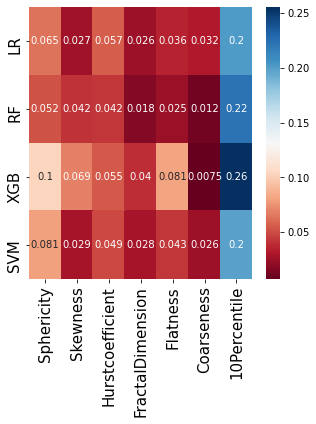

In [210]:
heatmap(ftr_importance_heatmap,'feature_importance')